<h1>What are the lyrical differences between pop, rock and hip-hop songs? </h1>
<ul> 
    <li>
        <p>
            What are the common themes in each genre, are they shared or do they differentiate from genre to genre
        </p>
    </li>
        <li>
        <p>
            Do certain genres contain more mature language than the others?
        </p>
    </li>
</ul>

In [19]:
import pandas

<p> First we read the lyric excel file and filter out all the songs which does <i>not</i> have the Idiom English  </p>

In [20]:
lyrics = pandas.read_csv('lyrics-data.csv')
english_songs = lyrics['Idiom'] =='ENGLISH' 


In [21]:
english = lyrics[english_songs]

In [22]:
artist = pandas.read_csv('artists-data.csv')
print(artist.shape)
pop = artist['Genre'] == 'Pop'
rock = artist['Genre'] == 'Rock'
hiphop = artist['Genre'] == 'Hip Hop'

popsongs = artist[pop]
rocksongs = artist[rock]
hiphopsongs = artist[hiphop]

english_popsongs = pandas.merge(popsongs, english, left_on='Link', right_on='ALink')
english_popsongs.to_csv('englishPopSongs.csv', index=False)

english_rocksongs = pandas.merge(rocksongs, english, left_on='Link', right_on='ALink')
english_rocksongs.to_csv('englishRockSongs.csv', index=False)

english_hiphopsongs = pandas.merge(hiphopsongs, english, left_on='Link', right_on='ALink')
english_hiphopsongs.to_csv('englishHipHopSongs.csv', index=False)



(3242, 6)


In [23]:

# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [24]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [25]:
# Apply a third round of cleaning
def clean_text_round3(text):
    '''Get rid of â€™Ă©Ł§ˇŞ '''
    text = re.sub('[^A-Za-z0-9 ]+', '',text)
    return text

round3 = lambda x: clean_text_round3(x)

In [27]:
pop_data_clean_round1 = pandas.DataFrame(english_popsongs['Lyric'].apply(clean_text_round1))
rock_data_clean_round1 = pandas.DataFrame(english_rocksongs['Lyric'].apply(clean_text_round1))
hiphop_data_clean_round1 = pandas.DataFrame(english_hiphopsongs['Lyric'].apply(clean_text_round1))

In [42]:
pop_data_clean_round2 = pandas.DataFrame(english_popsongs['Lyric'].apply(clean_text_round2))
rock_data_clean_round2 = pandas.DataFrame(english_rocksongs['Lyric'].apply(clean_text_round2))
hiphop_data_clean_round2 = pandas.DataFrame(english_hiphopsongs['Lyric'].apply(clean_text_round2))

In [43]:
pop_data_clean_round3 = pandas.DataFrame(english_popsongs['Lyric'].apply(clean_text_round3))
rock_data_clean_round3 = pandas.DataFrame(english_rocksongs['Lyric'].apply(clean_text_round3))
hiphop_data_clean_round3 = pandas.DataFrame(english_hiphopsongs['Lyric'].apply(clean_text_round3))

In [44]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [45]:
# remove stop words
def clean_text_round4(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    cleanedText = '';
    for word in words:
        if word not in stop_words:
            cleanedText += '{} '.format(word)
    return cleanedText

In [46]:
pop_data_clean_round4 = pandas.DataFrame(pop_data_clean_round3['Lyric'].apply(clean_text_round4))
rock_data_clean_round4 = pandas.DataFrame(rock_data_clean_round3['Lyric'].apply(clean_text_round4))
hiphop_data_clean_round4 = pandas.DataFrame(hiphop_data_clean_round3['Lyric'].apply(clean_text_round4))

In [77]:
from collections import Counter
pop_mfw = Counter(" ".join(pop_data_clean_round4["Lyric"]).split()).most_common(10)


In [78]:
rock_mfw = Counter(" ".join(rock_data_clean_round4 ["Lyric"]).split()).most_common(10)

In [79]:
hiphop_mfw = Counter(" ".join(hiphop_data_clean_round4 ["Lyric"]).split()).most_common(10)

In [92]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk

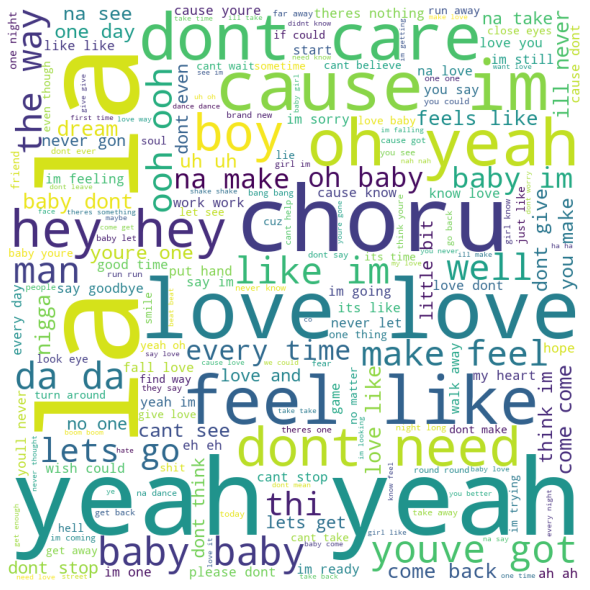

In [94]:
comment_words = ''
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['i', 'and', 'im', 'dont', 'the', 'na', 'got', 'get', 'but', 'oh', 'want', 'wan', 'go', 'gon', 'ill', 'your', 'thats', 'in', 'a' 'wont', 'ta', 'ive', 'when', 'what', 'to', 'let', 'the', 'if', 'em', 'aint', 'chorus', 'know', 'cant', 'so', 'when','this', 'verse', 'youre','go', 'its', 'ive', 'in', 'wont','just']
stopwords.extend(newStopWords)

for val in pop_data_clean_round4["Lyric"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
   
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

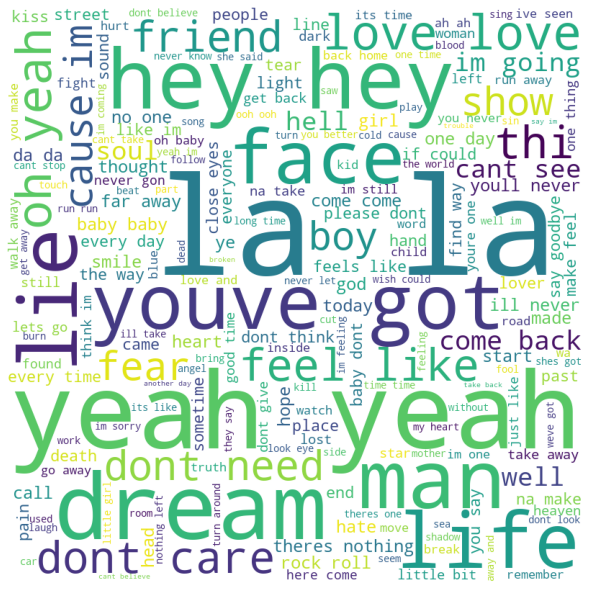

In [95]:
comment_words = ''
for val in rock_data_clean_round4["Lyric"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
   
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

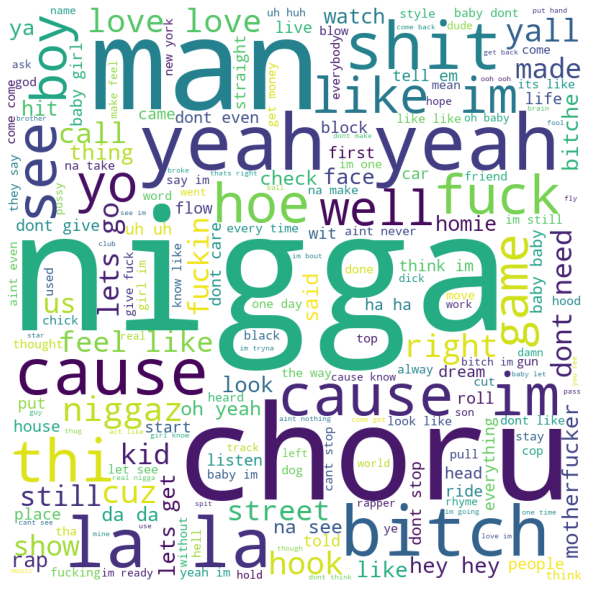

In [96]:
comment_words = ''
for val in hiphop_data_clean_round4["Lyric"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
   
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 